In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [101]:
true_positives = np.load('train/n_dataset/n_true_positives.npy')
true_negatives = np.load('train/n_dataset/n_true_negatives.npy')

In [75]:
-2 / np.abs(-2)

-1.0

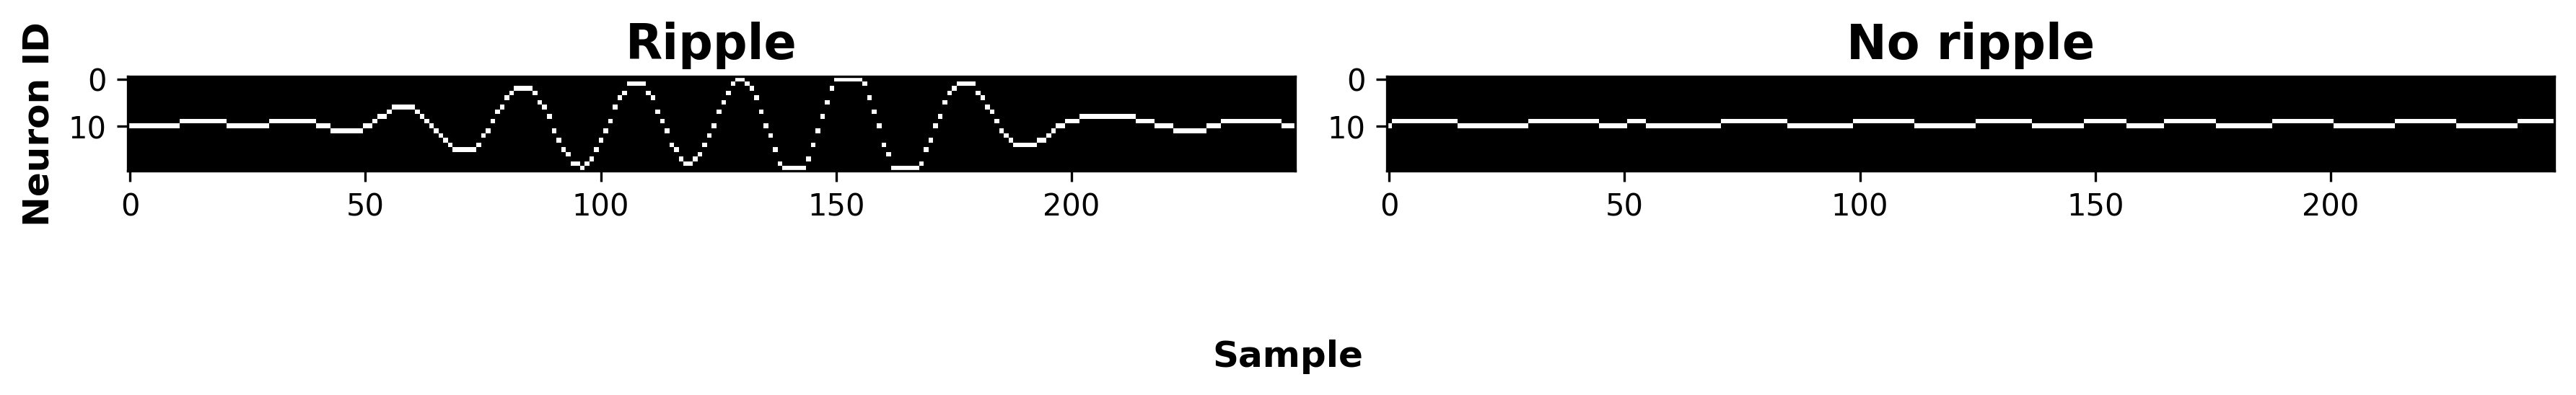

In [135]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 2.3), dpi=300)

# Plotting true positives
plt.subplot(1, 2, 1)
plt.imshow(true_positives[i], cmap='gray')
plt.title('Ripple', fontsize=16, fontweight='bold')  # Title with larger font size and bold
plt.ylabel('Neuron ID', fontweight='bold', fontsize=12)

# Plotting true negatives
plt.subplot(1, 2, 2)
plt.imshow(true_negatives[i], cmap='gray')
plt.title('No ripple', fontsize=16, fontweight='bold')  # Title with larger font size and bold

# Adjusting layout
plt.tight_layout()

# Manually adjusting layout to include the text
plt.subplots_adjust(bottom=0.3)  # Adjust the bottom margin to make space for the text

plt.text(0.5, 0.15, 'Sample', fontweight='bold', fontsize=12, ha='center', va='center', transform=plt.gcf().transFigure)

plt.savefig('img/Neuromorphic_example.svg', format='svg', transparent=True)
i += 1

In [1]:
import numpy as np

true_positives = np.load('train/dataset/true_positives.npy')
true_negatives = np.load('train/dataset/true_negatives.npy')

In [3]:
import sys
sys.path.insert(0,'liset_tk')
from liset_tk import liset_tk
import os

parent = r'D:\NCN_group\Marcos\CNN_TRAINING_SESSIONS'
paths = [os.path.join(parent, i) for i in os.listdir(parent)]
liset = liset_tk(data_path=paths[0], shank=3, start=0, numSamples=1000000, downsample=4000)

Downsampling data from 30000 Hz to 4000 Hz... Done!
Normalizing data... Done!
Shape of loaded data after downsampling and z-score:  (133333, 8)


In [30]:
liset.ripples_GT

array([[  6716,   6877],
       [  9098,   9267],
       [ 10816,  10925],
       [  8434,   8556],
       [ 36204,  36391],
       [ 35714,  35844],
       [ 45302,  45471],
       [ 46005,  46178],
       [ 43168,  43285],
       [ 46886,  47115],
       [ 50873,  51020],
       [ 67441,  67588],
       [ 70764,  70903],
       [ 71675,  71784],
       [ 72061,  72200],
       [ 77380,  77506],
       [ 74413,  74538],
       [ 73779,  73953],
       [ 72660,  72881],
       [ 75155,  75306],
       [ 81558,  81732],
       [121888, 122074],
       [127437, 127610],
       [123302, 123484],
       [131935, 132139],
       [132565, 132673],
       [129454, 129619]])

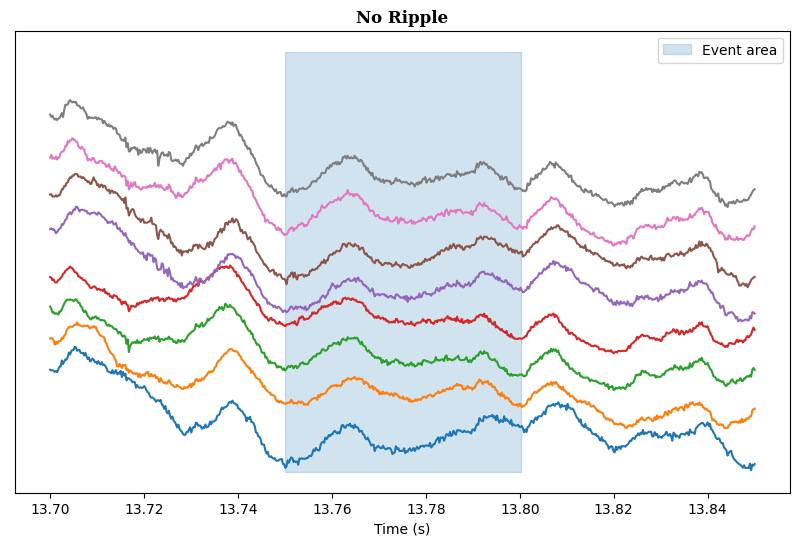

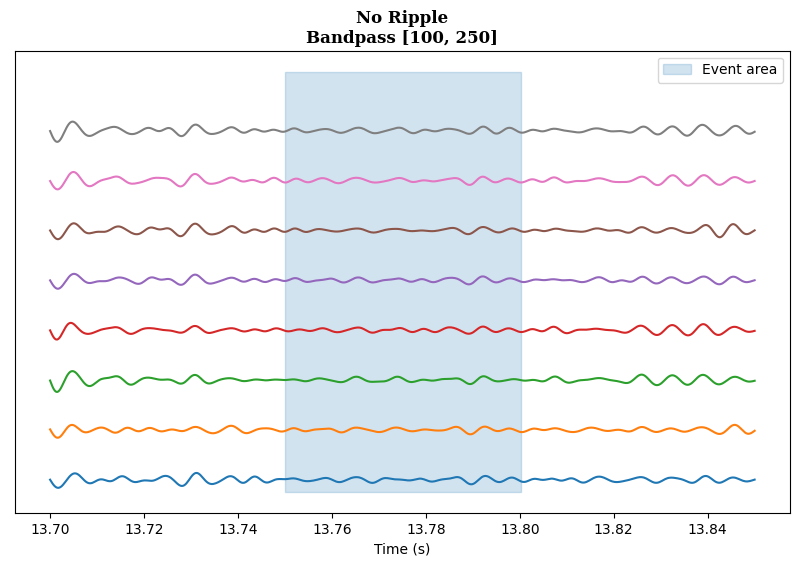

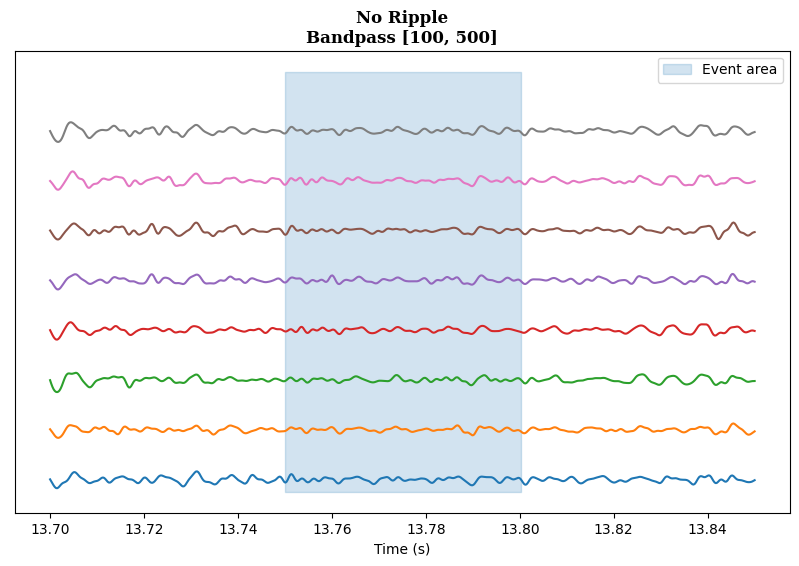

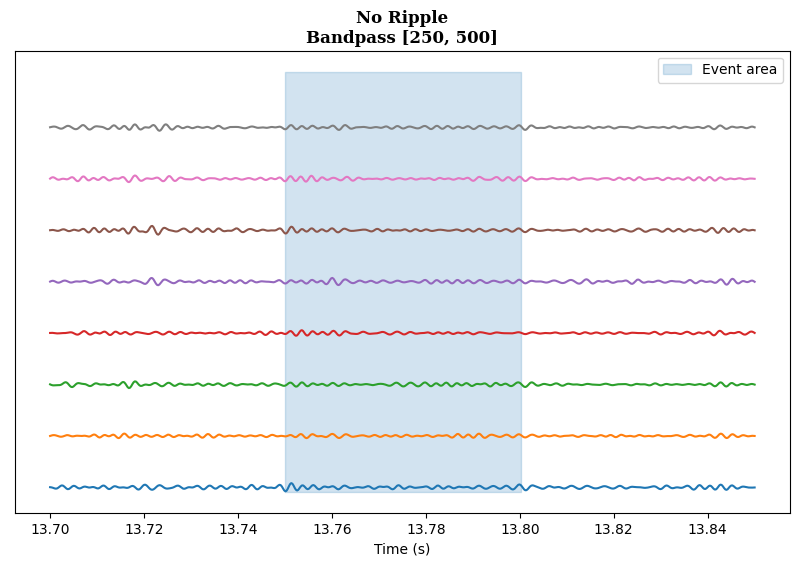

In [34]:
no_ripple = [55000, 55200]
for filter in filters:
    if filter:
        liset.plot_event(
            no_ripple, 
            extend=extend, 
            offset=offset, 
            delimiter=True, 
            title=f'No Ripple\nBandpass {filter}', 
            filtered=filter
            )
        liset.savefig(f'img/bandpass_filter/NoRipple_filtered_{filter[0]}-{filter[1]}.svg')
    else:
        liset.plot_event(
            no_ripple, 
            extend=extend, 
            offset=offset, 
            delimiter=True, 
            title=f'No Ripple', 
            filtered=filter
            )
        liset.savefig(f'img/bandpass_filter/NoRipple.svg')

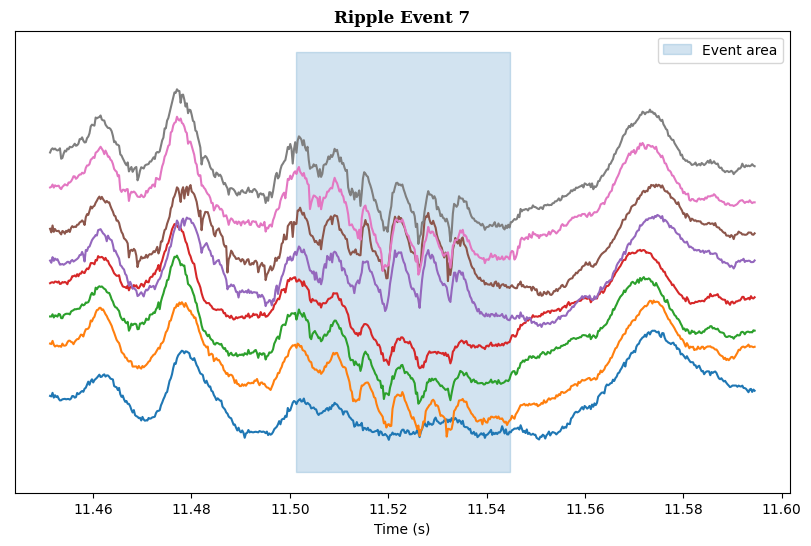

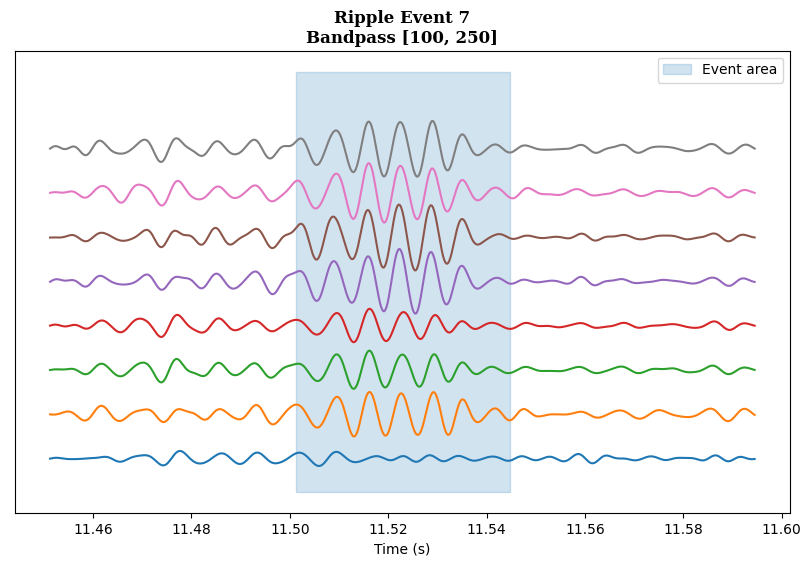

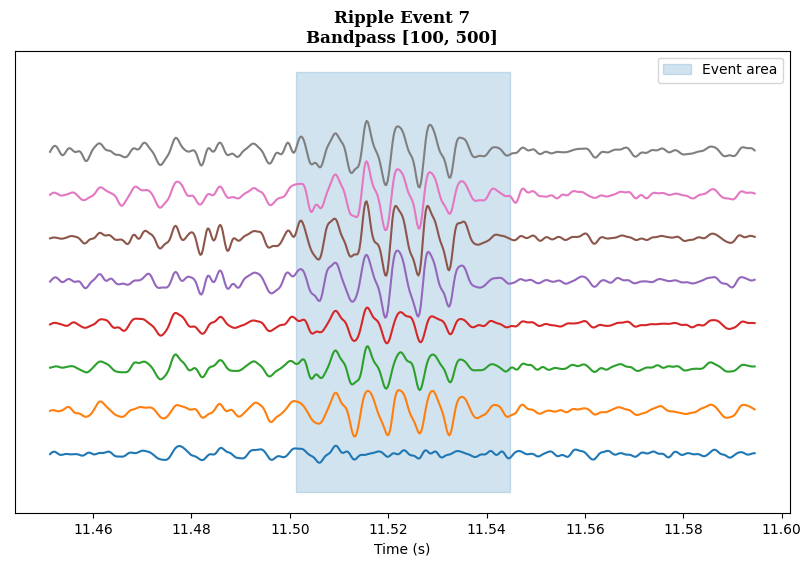

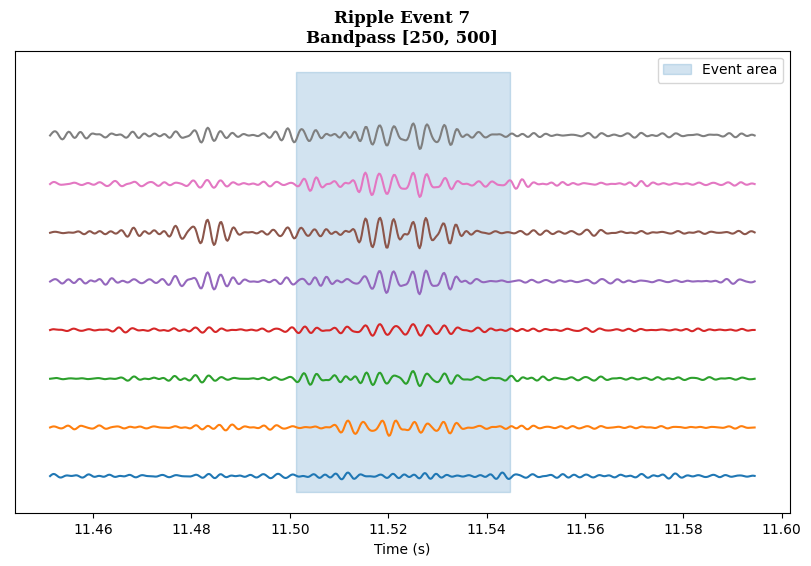

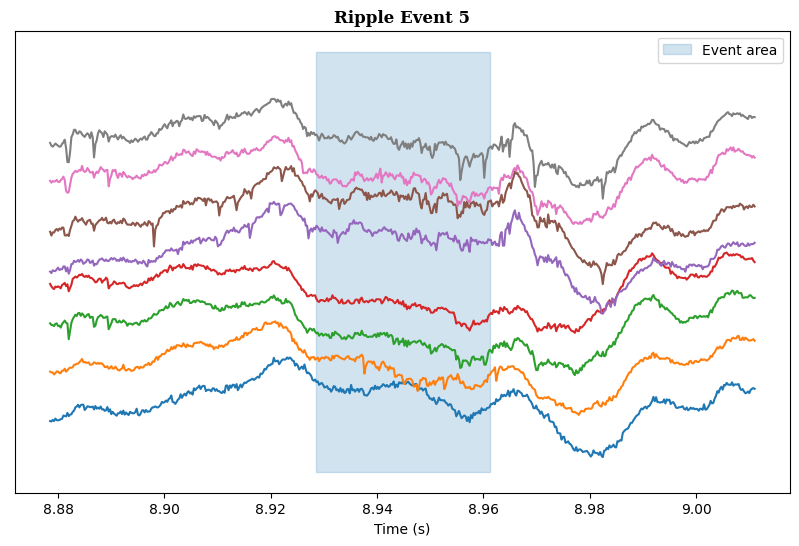

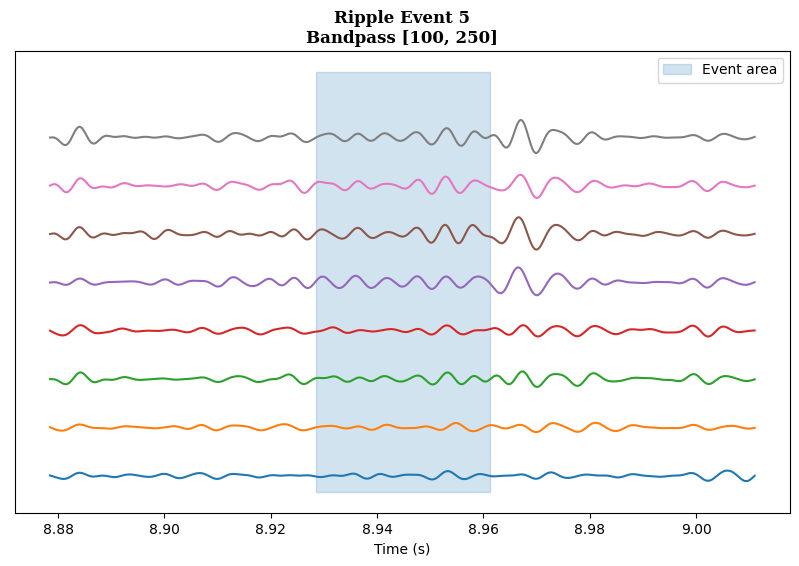

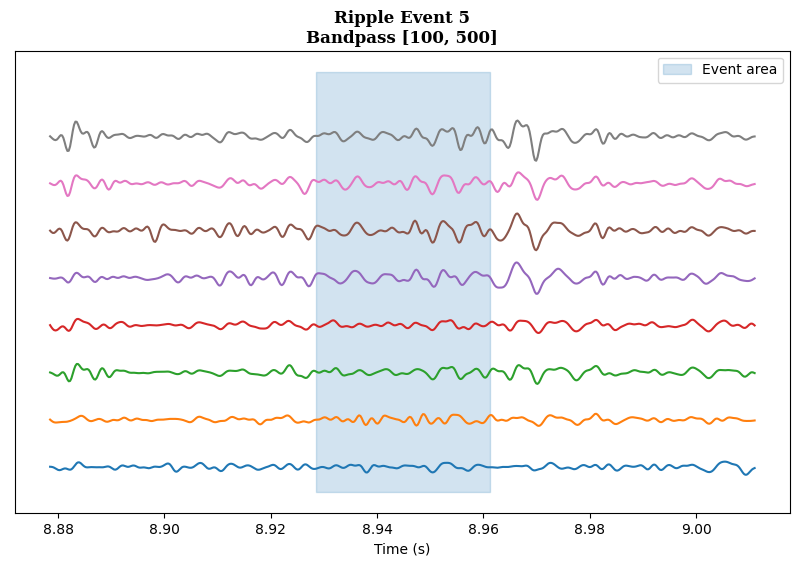

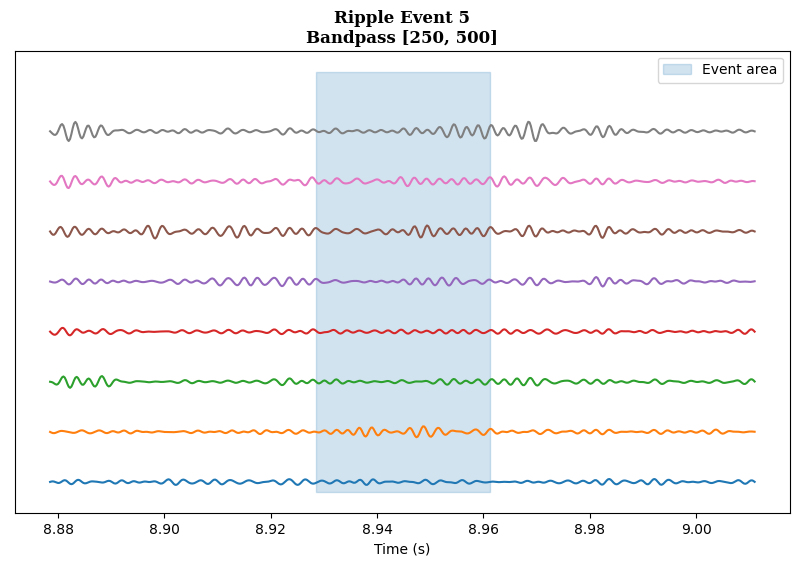

In [28]:
filters = [[], [100, 250], [100, 500], [250, 500]]
offset = 2
extend = 200
samples = [7, 5]

for i, sample in enumerate(samples):
    for filter in filters:
        if filter:
            liset.plot_event(
                liset.ripples_GT[sample], 
                extend=extend, 
                offset=offset, 
                delimiter=True, 
                title=f'Ripple Event {sample}\nBandpass {filter}', 
                filtered=filter
                )
            liset.savefig(f'img/bandpass_filter/type_{i}_filtered_{filter[0]}-{filter[1]}.svg')
        else:
            liset.plot_event(
                liset.ripples_GT[sample], 
                extend=extend, 
                offset=offset, 
                delimiter=True, 
                title=f'Ripple Event {sample}', 
                filtered=filter
                )
            liset.savefig(f'img/bandpass_filter/type_{i}.svg')
        

In [26]:
liset.ripples_GT / liset.fs

array([[ 2.02075,  2.07075],
       [ 5.80275,  5.84075],
       [ 5.371  ,  5.43075],
       [10.36025, 10.4145 ],
       [10.5425 , 10.59225],
       [10.8885 , 10.9275 ],
       [ 8.51425,  8.55225],
       [14.7875 , 14.831  ],
       [14.87225, 14.90025],
       [17.1195 , 17.153  ],
       [17.216  , 17.241  ],
       [22.41325, 22.45025],
       [22.5305 , 22.5565 ],
       [22.65525, 22.68025]])

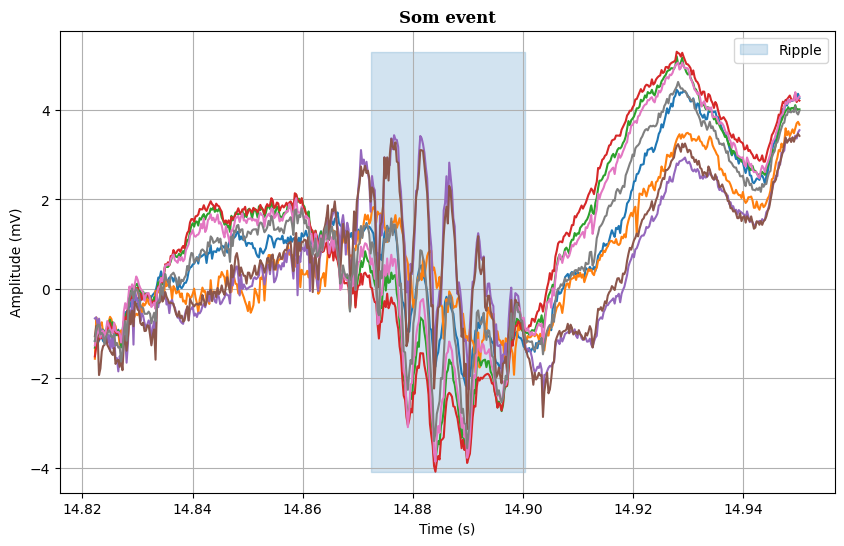

In [45]:
idx = 8
# 9, 12, 13
extend = 200
bandpass = []
offset=0

liset.plot_event(liset.ripples_GT[idx], extend=extend, offset=offset, label='Ripple', filtered=bandpass, title=f'Som event', delimiter=True)
# liset.savefig('img/Som_1event.svg')

In [5]:
from signal_aid import most_active_channel, y_discretize_1Dsignal, cutoff_amplitude

signal = most_active_channel(liset.window)
cutoff = cutoff_amplitude(true_positives)

spikes = y_discretize_1Dsignal(signal, 50, cutoff)
np.save('../input_spikes.npy', arr=spikes, allow_pickle=True)

In [6]:
from anim import slayer_gif

slayer_gif(spikes, filename='../gifs/ripple', figsize=(30,5), fps=5)

In [8]:
spikes.shape

(50, 1488)